In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/ai-ut/NNDL

In [ ]:
%ls gdrive/MyDrive

ls: cannot access 'gdrive/MyDrive': No such file or directory


In [2]:
%cd gdrive/MyDrive/NNDL

/content/gdrive/MyDrive/NNDL


In [ ]:
!unrar x "/content/gdrive/MyDrive/Untitled Folder/NN_HW2_Face_Emotion.rar" "/content/AffectNet/"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Cannot open /content/gdrive/MyDrive/Untitled Folder/NN_HW2_Face_Emotion.rar
No such file or directory
No files to extract


In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Define paths
base_dir = 'AffectNet'
train_dir = os.path.join(base_dir, 'TRAIN')
tune_dir = os.path.join(base_dir, 'TUNE')

# Data augmentation configuration for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Splitting the training data into 80% train, 20% validation
)

# Data generator for tuning data (no augmentation, just normalization)
tune_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of (for example, 32) using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=400,
    class_mode='categorical',  # Assuming categorical labels
    subset='training'  # Set as training data
    # ,shuffle=False
)

# Flow validation images in batches of 32 using train_datagen generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=400,
    class_mode='categorical',
    subset='validation'  # Set as validation data
    # ,shuffle=False
)

# Flow tuning images in batches of 32 using tune_datagen generator
tune_generator = tune_datagen.flow_from_directory(
    tune_dir,
    target_size=(128, 128),
    batch_size=400,
    class_mode='categorical'
    # ,shuffle=False
)


Found 6409 images belonging to 8 classes.
Found 1601 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.


In [4]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout,GaussianDropout

def VGGNet():
    model = Sequential()
    # CONV BLOCK 1
    model.add(Conv2D(16, (3, 3), input_shape=(128, 128, 3), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(16, (3, 3), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(GaussianDropout(0.2))
    # CONV BLOCK 2
    model.add(Conv2D(32, (3, 3), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(GaussianDropout(0.2))
    # CONV BLOCK 3
    model.add(Conv2D(64, (3, 3), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(GaussianDropout(0.2))
    # CONV BLOCK 4
    model.add(Conv2D(128, (3, 3), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(GaussianDropout(0.2))
    # CONV BLOCK 5
    model.add(Conv2D(128, (3, 3), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(GaussianDropout(0.2))
    # flatten
    model.add(Flatten())
    # dense 1
    model.add(Dense(1024, use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    # dense 2
    model.add(Dense(1024, use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    # OUTPUT
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Summary of the model
    model.summary()

    return model

In [5]:
model = VGGNet()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      432       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 16)      64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 128, 128, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      2304      
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 16)      64        
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 128, 128, 16)      0

In [6]:
from tensorflow.keras.optimizers import Adam

# Assuming 'model' is your pre-defined Keras model

# Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
initial_epochs = 25  # for example, set the number of epochs for initial training
history = model.fit(
    train_generator,
    epochs=initial_epochs,
    validation_data=validation_generator
)

# Now, let's fine-tune the model
# For fine-tuning, you might want to modify the learning rate, unfreeze some layers etc.
# This part depends on your specific model and approach
model.compile(optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

fine_tune_epochs = 10  # Set the number of fine-tuning epochs
total_epochs = initial_epochs + fine_tune_epochs

# Fine-tune the model
fine_tune_history = model.fit(
    tune_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=validation_generator
)

# Save the model if necessary
model.save('path_to_my_model.h5')


Epoch 1/25
17/17 [==============================] - 1514s 93s/step - loss: 2.6339 - accuracy: 0.1328 - val_loss: 2.0884 - val_accuracy: 0.1249
Epoch 2/25
17/17 [==============================] - 52s 3s/step - loss: 2.3883 - accuracy: 0.1406 - val_loss: 2.0896 - val_accuracy: 0.1255
Epoch 3/25
17/17 [==============================] - 54s 3s/step - loss: 2.3179 - accuracy: 0.1414 - val_loss: 2.0977 - val_accuracy: 0.1249
Epoch 4/25
17/17 [==============================] - 52s 3s/step - loss: 2.2908 - accuracy: 0.1423 - val_loss: 2.0966 - val_accuracy: 0.1274
Epoch 5/25
17/17 [==============================] - 54s 3s/step - loss: 2.2897 - accuracy: 0.1323 - val_loss: 2.0914 - val_accuracy: 0.1205
Epoch 6/25
17/17 [==============================] - 52s 3s/step - loss: 2.2422 - accuracy: 0.1481 - val_loss: 2.1070 - val_accuracy: 0.1249
Epoch 7/25
17/17 [==============================] - 54s 3s/step - loss: 2.2383 - accuracy: 0.1521 - val_loss: 2.0869 - val_accuracy: 0.1505
Epoch 8/25
17/17 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

additional_epochs = 20
# Continue training the model
continued_history = model.fit(
    train_generator,
    epochs=additional_epochs+initial_epochs+10,
    initial_epoch=history.epoch[-1] + 1,
    validation_data=validation_generator
)

model.compile(optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

additional_fine_tune_epochs = 10
# Fine-tune the model again
additional_fine_tune_history = model.fit(
    tune_generator,
    epochs=additional_fine_tune_epochs+total_epochs+5,
    initial_epoch=fine_tune_history.epoch[-1] + 1,
    validation_data=validation_generator
)

# Combine the history from the previous training session with the new one
# Note that 'history.history' is a dictionary with keys for each metric
# For each metric, extend the list with the values from the continued training
for key in history.history:
    history.history[key].extend(continued_history.history[key])

for key in fine_tune_history.history:
    fine_tune_history.history[key].extend(additional_fine_tune_history.history[key])

Epoch 26/55
17/17 [==============================] - 64s 3s/step - loss: 1.8162 - accuracy: 0.3055 - val_loss: 2.7795 - val_accuracy: 0.1980
Epoch 27/55
17/17 [==============================] - 55s 3s/step - loss: 1.7148 - accuracy: 0.3219 - val_loss: 2.2102 - val_accuracy: 0.2392
Epoch 28/55
17/17 [==============================] - 56s 3s/step - loss: 1.6986 - accuracy: 0.3367 - val_loss: 2.0266 - val_accuracy: 0.2430
Epoch 29/55
17/17 [==============================] - 65s 4s/step - loss: 1.6881 - accuracy: 0.3242 - val_loss: 3.4800 - val_accuracy: 0.2036
Epoch 30/55
17/17 [==============================] - 56s 3s/step - loss: 1.7171 - accuracy: 0.3334 - val_loss: 4.0490 - val_accuracy: 0.2167
Epoch 31/55
17/17 [==============================] - 65s 4s/step - loss: 1.6693 - accuracy: 0.3609 - val_loss: 1.9349 - val_accuracy: 0.2786
Epoch 32/55
17/17 [==============================] - 55s 3s/step - loss: 1.6041 - accuracy: 0.3662 - val_loss: 1.9170 - val_accuracy: 0.2923
Epoch 33/55
1

In [17]:
train_generator.shuffle = False
validation_generator.shuffle = False

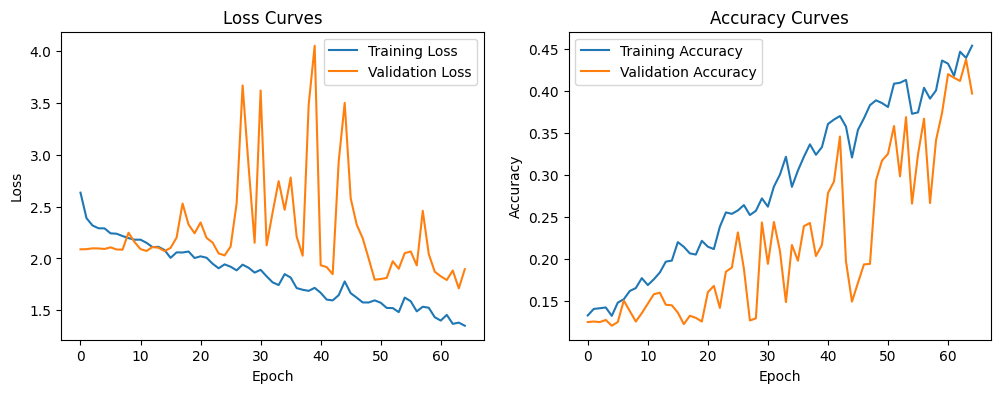

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import label_binarize
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# Plotting Loss and Accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
validation_generator.shuffle = False
train_generator.shuffle = False

In [19]:
# Evaluate the model on the validation set
validation_results = model.evaluate(validation_generator)

# Get predictions on the validation set
validation_predictions = model.predict(validation_generator)

5/5 [==============================] - 15s 3s/step


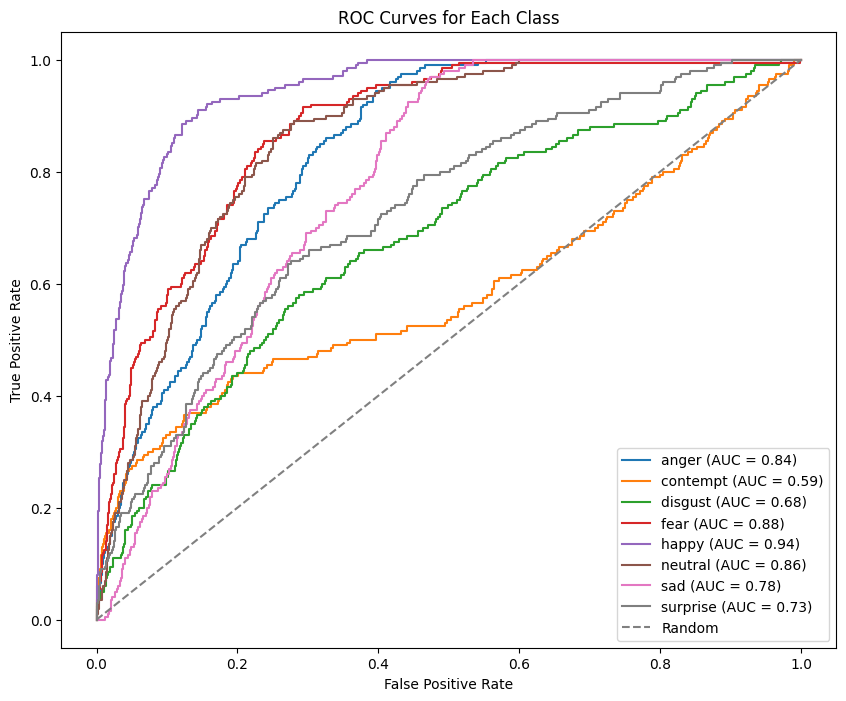

In [20]:
# Plot ROC curves for each class
classes = ["anger", "contempt", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
num_classes = len(classes)

validation_labels = label_binarize(validation_generator.classes, classes=[0,1,2,3,4,5,6,7])

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(validation_labels[:, i], validation_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curves for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [21]:
# Calculate precision, recall, and F1 for each class
validation_pred_classes = validation_predictions.argmax(axis=-1)
validation_true_classes = validation_generator.classes

precision, recall, f1, _ = precision_recall_fscore_support(validation_true_classes, validation_pred_classes)

for i in range(num_classes):
    print(f'Class {classes[i]}\t - Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}, F1 Score: {f1[i]:.4f}')

Class anger	 - Precision: 0.3690, Recall: 0.4650, F1 Score: 0.4115
Class contempt	 - Precision: 0.5333, Recall: 0.2000, F1 Score: 0.2909
Class disgust	 - Precision: 0.3111, Recall: 0.0700, F1 Score: 0.1143
Class fear	 - Precision: 0.5446, Recall: 0.2750, F1 Score: 0.3654
Class happy	 - Precision: 0.4873, Recall: 0.8607, F1 Score: 0.6223
Class neutral	 - Precision: 0.2988, Recall: 0.7650, F1 Score: 0.4298
Class sad	 - Precision: 0.3059, Recall: 0.1300, F1 Score: 0.1825
Class surprise	 - Precision: 0.1648, Recall: 0.1450, F1 Score: 0.1543


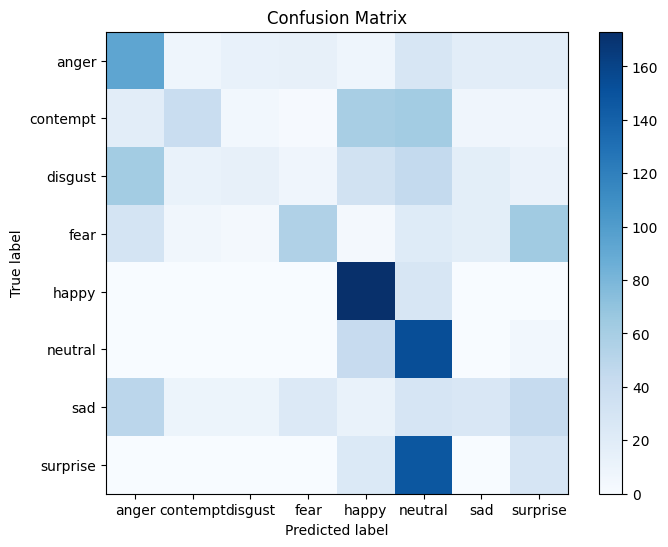

In [22]:
# Plot confusion matrix
conf_matrix = confusion_matrix(validation_true_classes, validation_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(num_classes)
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()